# Heart Disease Prediction Project

## 1. Introduction

### Project Overview
This project aims to develop a predictive model to identify the likelihood of heart disease in patients. Leveraging machine learning techniques, the model will analyze various medical parameters to predict heart disease risk. This tool's primary goal is to aid healthcare professionals in early diagnosis and personalized patient care.

### Background
Heart disease, encompassing a range of cardiovascular conditions, is a leading cause of mortality worldwide. Early detection and preventive measures can significantly improve patient outcomes. Data science plays a crucial role in healthcare by enabling the analysis of complex medical data to identify patterns and predict health risks.

 ### Project Objectives
- **Predictive Modeling**: To create a model that accurately predicts the presence of heart disease in patients based on a range of medical parameters.
- **Data Analysis**: To perform an extensive exploratory data analysis (EDA) to understand the relationships between different health indicators and heart disease.
- **Model Evaluation**: To rigorously test the performance of various machine learning algorithms and select the best performing model based on relevant metrics.


## 2. Data Source and Description

### Data Acquisition
The dataset for this project was sourced from [OpenML](https://www.openml.org/search?type=data&status=active&id=43672), specifically designed for heart disease prediction. It encompasses a comprehensive set of medical parameters collected from various patients.

### Dataset Description
The dataset comprises several features that are critical in diagnosing heart disease, including:
- **Age**: Patient's age in years.
- **Sex**: Patient's sex (1 = male, 0 = female).
- **Chest Pain Type**: Type of chest pain experienced by the patient.
- **Resting Blood Pressure**: Resting blood pressure value of the patient.
- **Cholesterol**: Serum cholesterol level.
- **Fasting Blood Sugar**: Indicates if fasting blood sugar is higher than 120 mg/dl (1 = true, 0 = false).
- **Resting ECG**: Results of the electrocardiogram on rest.
- **Max Heart Rate**: Maximum heart rate achieved.
- **Exercise Angina**: Angina induced by exercise (1 = yes, 0 = no).
- **Oldpeak**: ST depression induced by exercise relative to rest.
- **ST Slope**: The slope of the peak exercise ST segment.
- **Target**: Presence of heart disease (1 = present, 0 = absent).

The dataset consists of [number of samples] instances with [number of features] features, providing a robust foundation for building a predictive model.

## Table of Contents
1. [Data Loading and Initial Exploration](#section1)
2. [Exploratory Data Analysis (EDA)](#section2)
3. [Data Preprocessing](#section3)
4. [Model Development](#section4)
5. [Model Evaluation](#section5)
6. [Conclusion and Recommendations](#section6)

<a id='section1'></a>
## 1. Data Loading and Initial Exploration

In [409]:
import pandas as pd

column_names = [
    "age", "sex", "chest_pain_type", "resting_bps", "cholesterol",
    "fasting_blood_sugar", "resting_ecg", "max_heart_rate",
    "exercise_angina","old_peak", "st_slope", "target"
]

# Load the dataset
file_path = '../data/raw/data.csv' 
data = pd.read_csv(file_path, names=column_names)


In [410]:
data.head()

,age,sex,chest_pain_type,resting_bps,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,old_peak,st_slope,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,1.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,1.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,1.0
4,54.0,1.0,3.0,150.0,195.0,0.0,0.0,122.0,0.0,0.0,1.0,0.0


In [411]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   float64
 1   sex                  1190 non-null   float64
 2   chest_pain_type      1190 non-null   float64
 3   resting_bps          1190 non-null   float64
 4   cholesterol          1190 non-null   float64
 5   fasting_blood_sugar  1190 non-null   float64
 6   resting_ecg          1190 non-null   float64
 7   max_heart_rate       1190 non-null   float64
 8   exercise_angina      1190 non-null   float64
 9   old_peak             1190 non-null   float64
 10  st_slope             1190 non-null   float64
 11  target               1190 non-null   float64
dtypes: float64(12)
memory usage: 111.7 KB


<a id='section1'></a>
## 2. Exploratory Data Analysis

### Categorical data

#### Convert categorical variables to 'category' data type


In [412]:
categorical_cols = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'resting_ecg', 'exercise_angina', 'st_slope', 'target']
data[categorical_cols] = data[categorical_cols].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  1190 non-null   float64 
 1   sex                  1190 non-null   category
 2   chest_pain_type      1190 non-null   category
 3   resting_bps          1190 non-null   float64 
 4   cholesterol          1190 non-null   float64 
 5   fasting_blood_sugar  1190 non-null   category
 6   resting_ecg          1190 non-null   category
 7   max_heart_rate       1190 non-null   float64 
 8   exercise_angina      1190 non-null   category
 9   old_peak             1190 non-null   float64 
 10  st_slope             1190 non-null   category
 11  target               1190 non-null   category
dtypes: category(7), float64(5)
memory usage: 55.8 KB


#### Frequency distribution of categorical variables


In [413]:
for col in categorical_cols:
    print(data[col].value_counts())
    print(" ")


sex
1.0    909
0.0    281
Name: count, dtype: int64
 
chest_pain_type
4.0    625
3.0    283
2.0    216
1.0     66
Name: count, dtype: int64
 
fasting_blood_sugar
0.0    936
1.0    254
Name: count, dtype: int64
 
resting_ecg
0.0    684
2.0    325
1.0    181
Name: count, dtype: int64
 
exercise_angina
0.0    729
1.0    461
Name: count, dtype: int64
 
st_slope
2.0    582
1.0    526
3.0     81
0.0      1
Name: count, dtype: int64
 
target
1.0    629
0.0    561
Name: count, dtype: int64
 


#### Visualize the relationship between categorical variables and the target

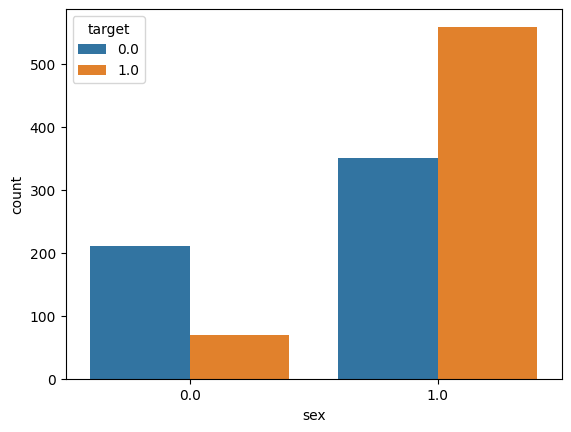

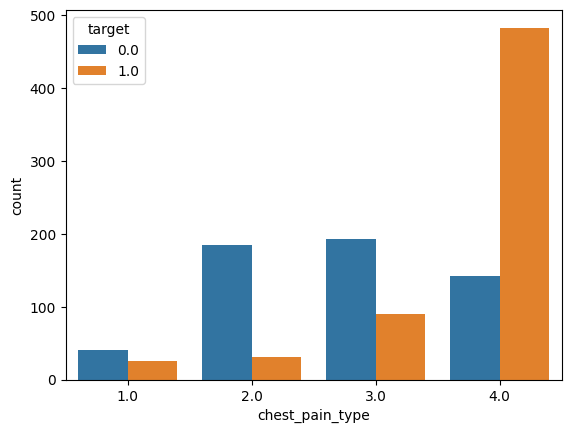

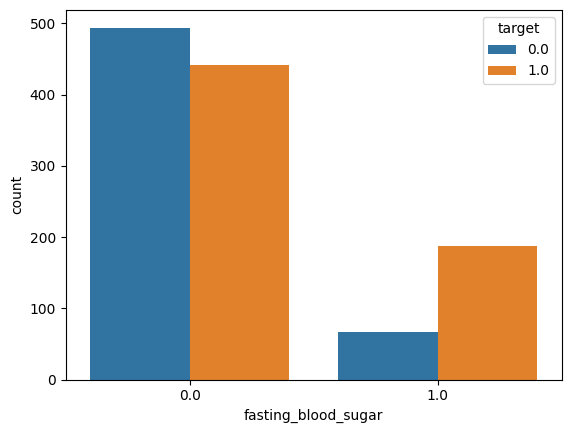

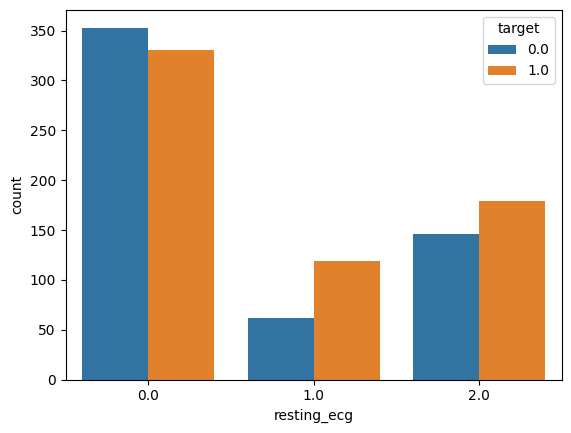

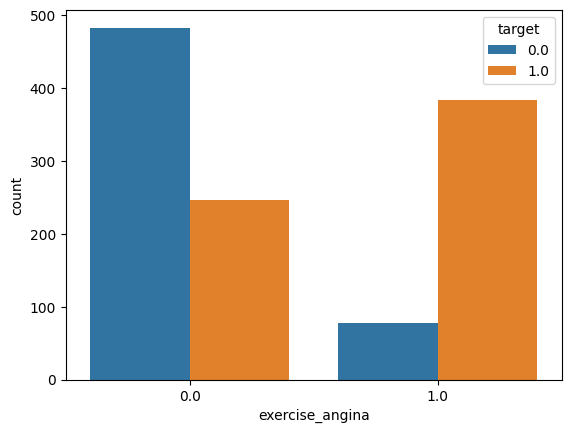

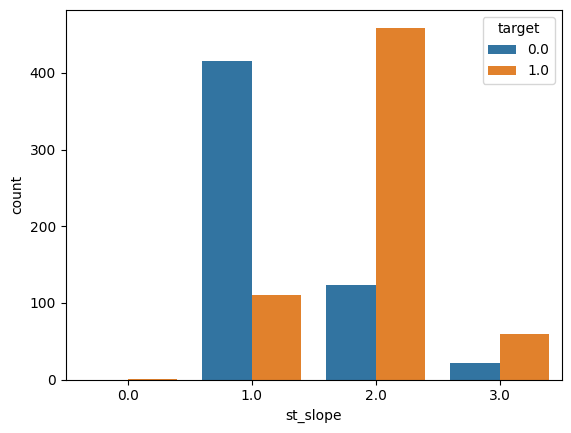

In [414]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in categorical_cols:
    if col != 'target':
        sns.countplot(x=col, hue='target', data=data)
        plt.show()

#### Descriptive statistics for numerical columns


In [415]:
data.describe()

,age,resting_bps,cholesterol,max_heart_rate,old_peak
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,132.153782,210.363866,139.732773,0.922773
std,9.358203,18.368823,101.420489,25.517636,1.086337
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,188.000000,121.000000,0.000000
50%,54.000000,130.000000,229.000000,140.500000,0.600000
75%,60.000000,140.000000,269.750000,160.000000,1.600000
max,77.000000,200.000000,603.000000,202.000000,6.200000


#### Histograms for numerical columns


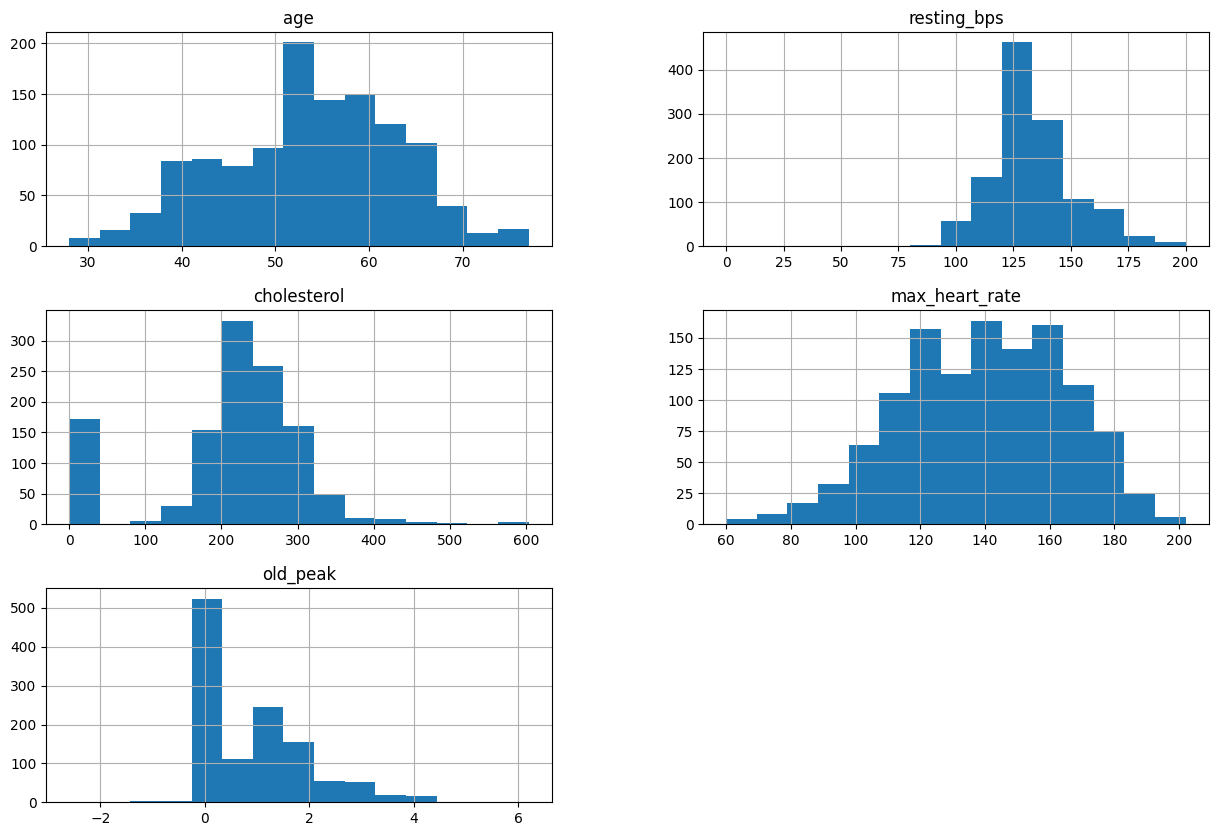

In [416]:
data.hist(bins=15, figsize=(15, 10))
plt.show()

#### Correlation matrix

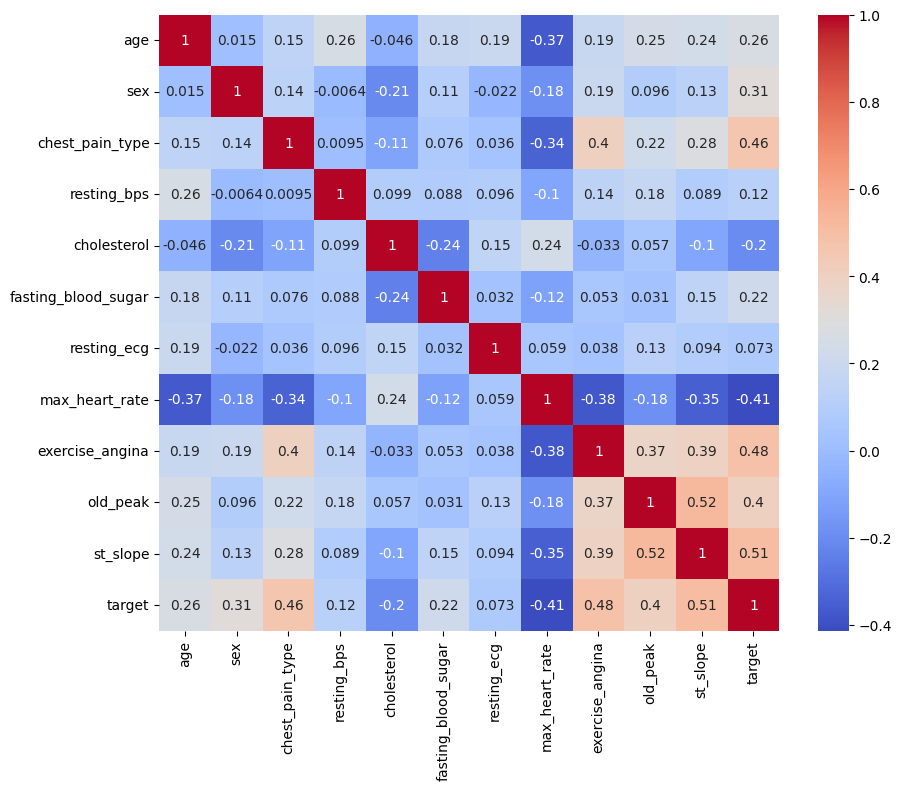

In [417]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

<a id='section3'></a>
## 3. Data Preprocessing

#### Identifying outliers

In [418]:
# Assuming 'data' is your pandas DataFrame
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_columns.to_list()

for col in numerical_cols:
    # Calculate IQR for cholesterol
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    print(col + ": ")
    print(f"IQR = {Q3} - {Q1} = {IQR}")

    # Define limits for potential outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    print(f"Lower limit for {col} = {lower_limit}")
    print(f"Upper limit for {col} = {upper_limit}")
    
    # Cap values at a determined upper limit
    data[col] = data[col].apply(lambda x: upper_limit if x > upper_limit else x)
    
    # Cap values at a determined lower limit
    data[col] = data[col].apply(lambda x: lower_limit if x < lower_limit else x)

    print()

age: 
IQR = 60.0 - 47.0 = 13.0
Lower limit for age = 27.5
Upper limit for age = 79.5

resting_bps: 
IQR = 140.0 - 120.0 = 20.0
Lower limit for resting_bps = 90.0
Upper limit for resting_bps = 170.0

cholesterol: 
IQR = 269.75 - 188.0 = 81.75
Lower limit for cholesterol = 65.375
Upper limit for cholesterol = 392.375

max_heart_rate: 
IQR = 160.0 - 121.0 = 39.0
Lower limit for max_heart_rate = 62.5
Upper limit for max_heart_rate = 218.5

old_peak: 
IQR = 1.6 - 0.0 = 1.6
Lower limit for old_peak = -2.4000000000000004
Upper limit for old_peak = 4.0



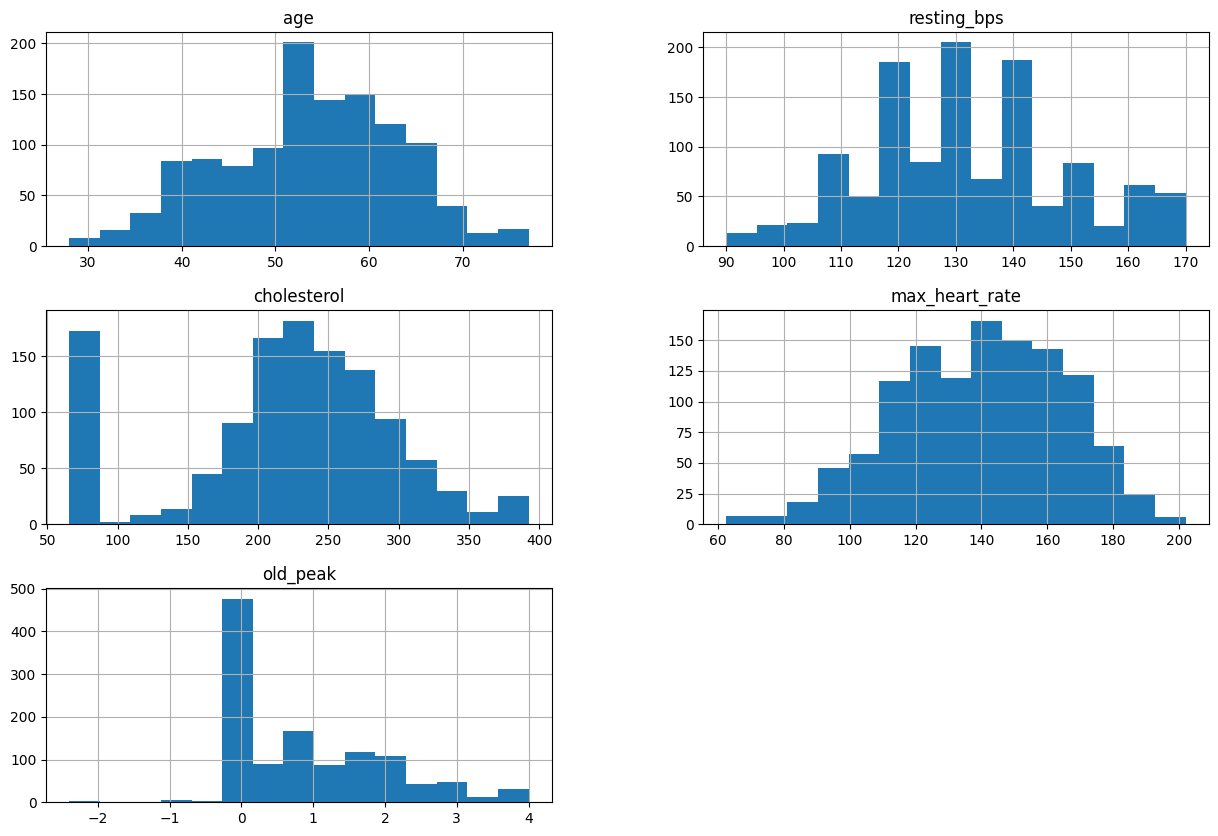

In [419]:
data.hist(bins=15, figsize=(15, 10))
plt.show()

In [420]:
data.describe()

,age,resting_bps,cholesterol,max_heart_rate,old_peak
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,131.857143,218.738971,139.734874,0.914706
std,9.358203,16.954987,79.528022,25.511168,1.055759
min,28.000000,90.000000,65.375000,62.500000,-2.400000
25%,47.000000,120.000000,188.000000,121.000000,0.000000
50%,54.000000,130.000000,229.000000,140.500000,0.600000
75%,60.000000,140.000000,269.750000,160.000000,1.600000
max,77.000000,170.000000,392.375000,202.000000,4.000000


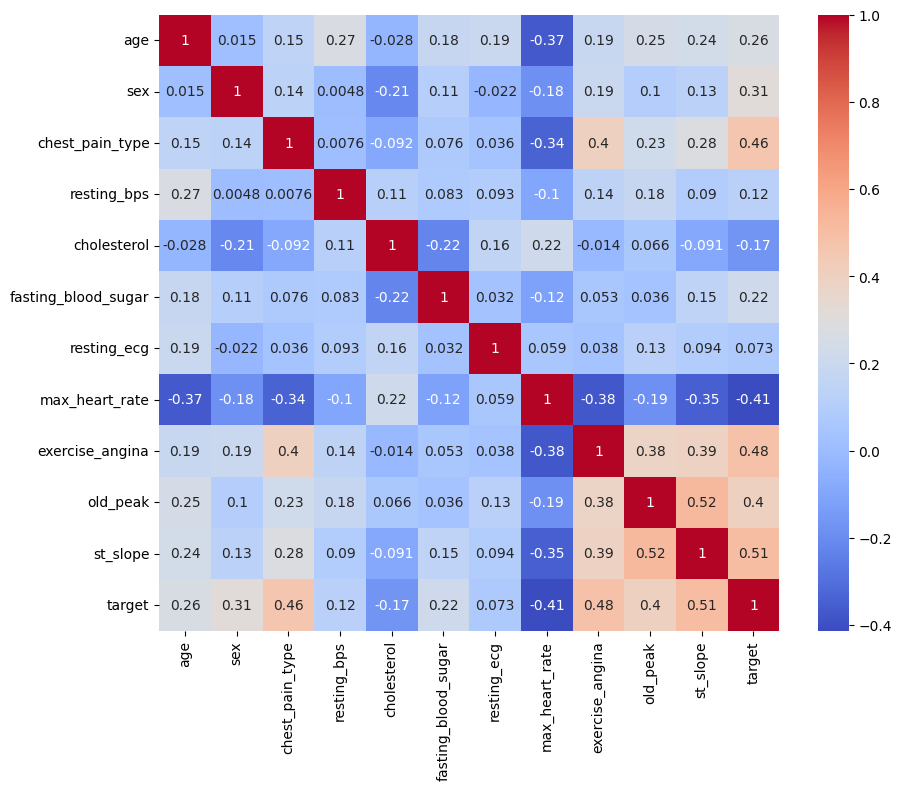

In [421]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

#### Splitting the data

In [422]:
from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1)  # Features
y = data['target']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Scaling numerical columns

In [423]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.to_list()

# Fit and transform the scaler on numerical columns of the training data
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])

# Transform the numerical columns of the testing data
X_test_scaled = scaler.transform(X_test[numerical_cols])




#### Encoding categorical columns

In [424]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = data.select_dtypes(include=['object', 'category']).columns.to_list()
categorical_cols.remove("target")


# Assuming 'categorical_cols' contains the names of your categorical columns
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform the encoder on categorical columns of the training data
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])

# Transform the categorical columns of the testing data
X_test_encoded = encoder.transform(X_test[categorical_cols])


#### Combining Scaled Numerical and Encoded Categorical Data


In [425]:
import numpy as np

# Recombine scaled numerical and encoded categorical features for the training set
X_train_prepared = np.concatenate((X_train_scaled, X_train_encoded), axis=1)

# Recombine for the testing set
X_test_prepared = np.concatenate((X_test_scaled, X_test_encoded), axis=1)


#### Taking a look at the preprocessed data as data frames

In [430]:
import pandas as pd

# Get new column names after one-hot encoding
encoded_cols = encoder.get_feature_names_out(categorical_cols)

# Combine all column names
all_cols = numerical_cols + list(encoded_cols)

# Convert arrays to dataframes
X_train_prepared_df = pd.DataFrame(X_train_prepared, columns=all_cols)
X_test_prepared_df = pd.DataFrame(X_test_prepared, columns=all_cols)

In [431]:
X_test_prepared_df.head()

,age,resting_bps,cholesterol,max_heart_rate,old_peak,sex_1.0,chest_pain_type_2.0,chest_pain_type_3.0,chest_pain_type_4.0,fasting_blood_sugar_1.0,resting_ecg_1.0,resting_ecg_2.0,exercise_angina_1.0,st_slope_1.0,st_slope_2.0,st_slope_3.0
0,0.762066,1.668111,-1.943994,0.199302,0.098850,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.019826,-0.691623,0.239695,0.396923,0.571266,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.125860,-0.573636,1.295755,0.594544,-0.845982,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.231895,1.373144,1.575675,0.396923,1.988513,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.656032,1.078178,0.506891,0.673592,1.610581,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [432]:
X_test_prepared_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      238 non-null    float64
 1   resting_bps              238 non-null    float64
 2   cholesterol              238 non-null    float64
 3   max_heart_rate           238 non-null    float64
 4   old_peak                 238 non-null    float64
 5   sex_1.0                  238 non-null    float64
 6   chest_pain_type_2.0      238 non-null    float64
 7   chest_pain_type_3.0      238 non-null    float64
 8   chest_pain_type_4.0      238 non-null    float64
 9   fasting_blood_sugar_1.0  238 non-null    float64
 10  resting_ecg_1.0          238 non-null    float64
 11  resting_ecg_2.0          238 non-null    float64
 12  exercise_angina_1.0      238 non-null    float64
 13  st_slope_1.0             238 non-null    float64
 14  st_slope_2.0             2

In [433]:
X_test_prepared_df.describe()

,age,resting_bps,cholesterol,max_heart_rate,old_peak,sex_1.0,chest_pain_type_2.0,chest_pain_type_3.0,chest_pain_type_4.0,fasting_blood_sugar_1.0,resting_ecg_1.0,resting_ecg_2.0,exercise_angina_1.0,st_slope_1.0,st_slope_2.0,st_slope_3.0
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,-0.049230,0.039350,0.036746,-0.043987,0.091307,0.794118,0.180672,0.252101,0.516807,0.205882,0.155462,0.273109,0.428571,0.415966,0.525210,0.058824
std,0.959689,1.000539,1.057763,1.040260,0.984072,0.405197,0.385557,0.435134,0.500771,0.405197,0.363108,0.446495,0.495915,0.493927,0.500416,0.235790
min,-2.737068,-2.225450,-1.943994,-3.041677,-1.885296,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.722415,-0.691623,-0.406028,-0.788801,-0.845982,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.019826,-0.101689,0.201525,0.001681,0.098850,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.656032,0.488244,0.748640,0.752640,0.736611,1.000000,0.000000,0.750000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,2.140513,2.258045,2.216627,2.175509,2.933345,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<a id='section4'></a>
## 4. Model Development

#### Model selection and training

In [435]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Initialize the models
log_reg = LogisticRegression()
rf_clf = RandomForestClassifier()

# Train the models
log_reg.fit(X_train_prepared, y_train)
rf_clf.fit(X_train_prepared, y_train)


RandomForestClassifier()

#### Evaluating models

In [436]:
from sklearn.model_selection import cross_val_score

# Logistic Regression cross-validation
log_reg_scores = cross_val_score(log_reg, X_train_prepared, y_train, cv=5)
print("Logistic Regression: ", log_reg_scores.mean())

# Random Forest cross-validation
rf_scores = cross_val_score(rf_clf, X_train_prepared, y_train, cv=5)
print("Random Forest: ", rf_scores.mean())


Logistic Regression:  0.8350454670708183
Random Forest:  0.9075282446955082


#### Confusion Matrix

In [441]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Logistic Regression
log_reg_pred = cross_val_predict(log_reg, X_train_prepared, y_train, cv=5)

# Random Forest
rf_pred = cross_val_predict(rf_clf, X_train_prepared, y_train, cv=5)


In [443]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(title)
    plt.show()


**Logistic regression**

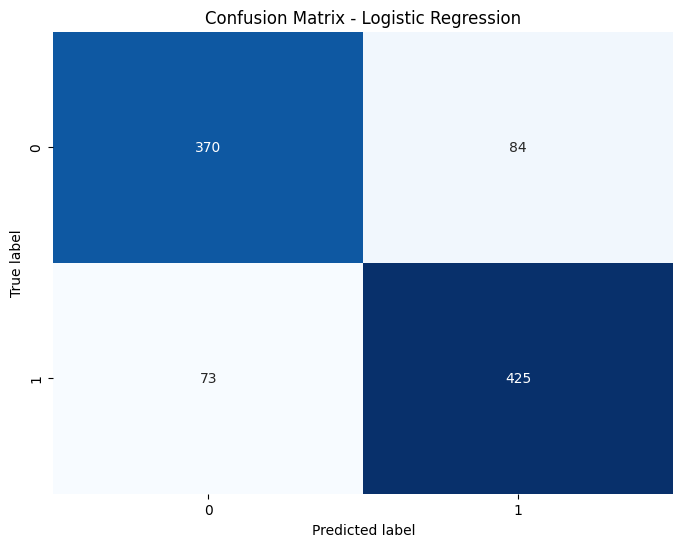

In [444]:
# Plotting confusion matrix for Logistic Regression
plot_confusion_matrix(y_train, log_reg_pred, 'Confusion Matrix - Logistic Regression')

**Random Forest**

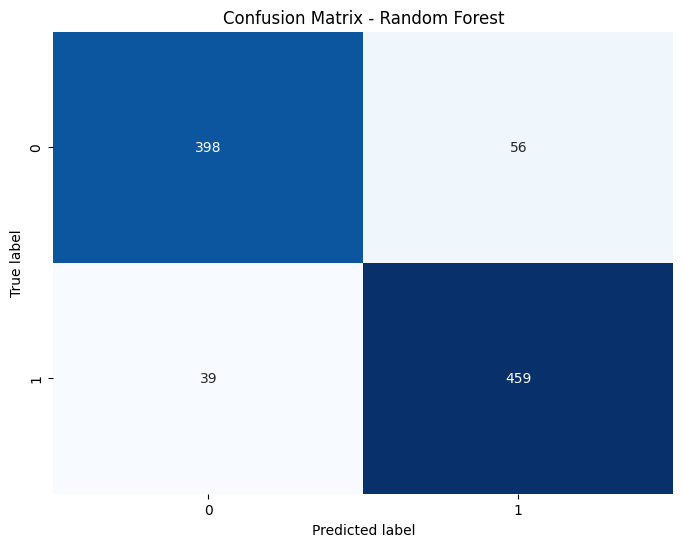

In [445]:
# Plotting confusion matrix for Random Forest
plot_confusion_matrix(y_train, rf_pred, 'Confusion Matrix - Random Forest')

#### Comparing using Sensitivity and Specificity

In [447]:
from sklearn.metrics import confusion_matrix

# For Logistic Regression
log_reg_cm = confusion_matrix(y_train, log_reg_pred)
TP_lr = log_reg_cm[1, 1]
TN_lr = log_reg_cm[0, 0]
FP_lr = log_reg_cm[0, 1]
FN_lr = log_reg_cm[1, 0]

# For Random Forest
rf_cm = confusion_matrix(y_train, rf_pred)
TP_rf = rf_cm[1, 1]
TN_rf = rf_cm[0, 0]
FP_rf = rf_cm[0, 1]
FN_rf = rf_cm[1, 0]


In [450]:
# Sensitivity and Specificity for Logistic Regression
sensitivity_lr = TP_lr / (TP_lr + FN_lr)
specificity_lr = TN_lr / (TN_lr + FP_lr)

# Sensitivity and Specificity for Random Forest
sensitivity_rf = TP_rf / (TP_rf + FN_rf)
specificity_rf = TN_rf / (TN_rf + FP_rf)

print("Logistic Regression\n - Sensitivity:", sensitivity_lr, "\n - Specificity:", specificity_lr)
print()
print("Random Forest\n - Sensitivity:", sensitivity_rf, "\n - Specificity:", specificity_rf)


Logistic Regression
 - Sensitivity: 0.8534136546184738 
 - Specificity: 0.8149779735682819

Random Forest
 - Sensitivity: 0.9216867469879518 
 - Specificity: 0.8766519823788547
